
# Introduction



The **rate law** or **rate equation** for a chemical reaction is an equation that links the *initial* or *forward reaction rate* with the *concentrations* or *pressures* of the reactants and constant parameters (normally rate coefficients and partial reaction orders).

The **kinematic theory** studies how the reactants and products of a chemical reaction appear/disappear in terms of their velocity.

To this purpose we need to model (under reasonable assumptions) the chemical reactions using (a set of) differential equations.

The first law of the kinematic theory is called **law of mass action** (LAM): this law is based on the assumption that a large number of small particles (with an individual random kinematic motion) could be bring back to a "low resolution" model.

In particular, the LAM states that the **velocity** of a chemical reaction is *proportional* to the concentration of the reactants and products, i.e

$$
\alpha A + \beta B \cdots \rightleftharpoons \cdots \sigma S + \theta T
$$

where $\alpha, \beta, \cdots$ are the numbers of molecules of types $A, B, \cdots$.

Using the symbol $[]$ to identify the **chemical concentration** of each species, using the LAM we can determine the set of **constants** which regulates the appearence/disappearence of the concetrantions

$$
k_+ [A]^\alpha [B]^\beta = \mbox{rate of (appearence) reactants}
$$
$$
k_- [S]^\sigma [T]^\tau = \mbox{rate of (disappearence) products}
$$


Using these reaction rates we can define the **equilibrium constant** of the reaction as

$$
K = \frac{k_+}{k_-} = \frac{[S]^\sigma [T]^\tau \cdots}{[A]^\alpha [B]^\beta \cdots}
$$

**Note:** This law is valid **only** if the number of particles/molecules are large enough ($\equiv N_A$), since it based on the assumption of homogeneous concentrations (it derives from a physical-statistical description of the system).

We can broadly divide the physycal-statistical chemical reactions into two categories:

* **reversible**

$$
A + A + B \rightarrow A_2 B \quad \Rightarrow \quad \frac{d[A_2B]}{dt} = k [A]^2 [B]
$$

* **irreversible**

$$
A + A + B \rightarrow C + D \quad \Rightarrow \quad \frac{d[C]}{dt} = k_{AB} [A]^2 [B] - k_{CD} [C][D]
$$

# Zero Order Kinetic

Zero-order reaction is the simplest case.

For zero-order reactions, the reaction rate is **independent** of the concentration of a reactant, so that changing its concentration has no effect on the speed of the reaction. 

Thus, the concentration changes *linearly* with time. 
This may occur when there is a bottleneck which limits the number of reactant molecules that can react at the same time, for example if the reaction requires contact with an enzyme or a catalytic surface.

$$
R \xrightarrow[]{k} P \quad \Rightarrow \quad v = \frac{d[A]}{dt} = -k
$$

The reaction above is an **irreversible** reaction and since there is not dependency on the concentrations we can conclude that the appearence rate of the product $P$ is equal to the disappearence rate of the reactant $R$, i.e all the reactant becomes product or (mathematically)

$$
\frac{d[R]}{dt} = - \frac{d[P]}{dt} = -k
$$

integrating this equation we obtain the solution

$$
P(t) = P_0 + k \cdot t
$$

which a motion at **constant velocity** (a *linear system*) in which the concentration of the product increases linearly with the time.

> Many enzyme-catalyzed reactions are zero order, provided that the reactant concentration is much greater than the enzyme concentration which controls the rate, so that the enzyme is saturated. 

> For example, the biological oxidation of ethanol to acetaldehyde by the enzyme liver alcohol dehydrogenase (LADH) is zero order in ethanol.

Let's try to implement the above consideration into a Python code.

First of all we have to define our differential equation as a classical function of Python.

>⚠️**Note:** A differential equation is essentially a derivative function.
Since we are working into a discrete system (PC) we have to re-think the equation into its discrete form, using the formal definition

$$
f'(x) = \lim_{\Delta x \rightarrow 0}\frac{\Delta y}{\Delta x} = \lim_{\Delta x \rightarrow 0}\frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

In [1]:
import numpy as np

def zero_order (x : np.ndarray, y0 : float, alpha : float) -> np.ndarray:
    '''
    Zero order kinetic
    
    Parameters
    ----------
        x : array-like
            List of time points
        
        y0 : float
            Initial condition of the reactant
        
        alpha : float
            Constant of the reaction
    
    Returns
    -------
        y : array-like
            The resulting product array    
    '''
    # determine the interval as diff
    dx = x[1] - x[0] # Note: we are assuming it is constant!!
    
    # Create an empty buffer to store our results
    # Its length must be greater than x since we want to set
    # the initial condition!
    y = np.empty(shape=(len(x) + 1, ), dtype=float)
    # Set the initial condition
    y[0] = y0
    
    # Integrate the equation using the Euler method
    for i, _ in enumerate(x):
        y[i + 1] = y[i] * (1. - alpha * dx)

    return y[:-1] # skip the latest point

Now we can set a series of initial parameter and use them to simulate our model.

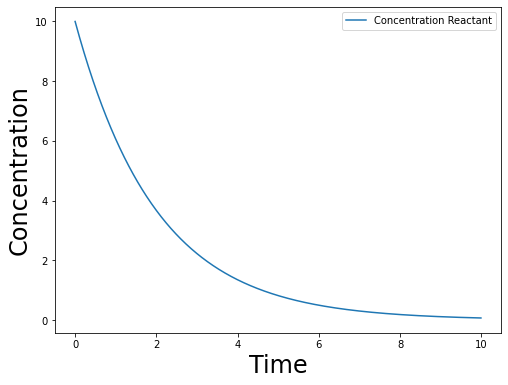

In [2]:
import pylab as plt

# initial conditions
y0 = 10
alpha = .5
iterations = 1000
dt = 1e-2

x = np.arange(0, iterations*dt, dt)
R = zero_order(x, y0, alpha)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(x, R, label='Concentration Reactant')
ax.set_xlabel('Time', fontsize=24)
ax.set_ylabel('Concentration', fontsize=24)
ax.legend()

#### Extra - C++ version

 For sake of completeness we implement the same functions also in C++.
 
 >⚠️**Note:** C++ is always **faster** than Python but more complex to write!
 > Furthermore, it is not straightforward the visualization of the results: if you are interested into a graphic library (please do not spend a lot of time to re-implement the same things!) you can use [GnuPlot](http://www.gnuplot.info/), [OpenCV](https://docs.opencv.org/3.4/d0/d1e/classcv_1_1plot_1_1Plot2d.html), or the easier [cv-plot](https://github.com/Profactor/cv-plot) libraries.

```c++
// g++ zero_order_kinetic.cpp -std=c++14 -O3 -o zero_order_kinetic

#include <memory>
#include <algorithm>
#include <type_traits>

// just to be sure that the given value is a floating point one...
template < class type >
using is_floating_point = typename std :: enable_if < std :: is_floating_point < type > :: value > :: type *;

template < class type, is_floating_point < type > = nullptr >
using array = std :: unique_ptr < type[] >;
 
/**
* @brief Zero order kinetic
*
* @param x List of time points.
* @param y0 Initial condition of the reactant.
* @param alpha Constant of the reaction.
*
* @tparam type Data-type of arrays
* @tparam Length of time points.
*
* @return The resulting product array.
*
*/
template < class type, int32_t N >
array < type > zero_order (const array < type > & x, const type & y0, const type & alpha)
{
  // determine the interval as diff
  const type dx = x[1] - x[0]; // Note: we are assuming it is constant!!
  
  // Create an empty buffer to store our results
  array < type > y = std :: make_unique < type[] >(N);
  // Set the initial condition
  y[0] = y0;
  
  // Integrate the equation using the Euler method
  for (int32_t i = 0; i < N - 1; ++i)
    y[i + 1] = y[i] * (type(1.) - alpha * dx);
    
  return y;
}


int32_t main (/*int32_t argc, char ** argv*/)
{
  const float y0 = 10.f;
  const float alpha = 0.5f;
  
  const int32_t iterations = 1000;
  const float dt = 1e-2f;
  
  array < float > x(new float[iterations]);
  std :: generate_n(x.get(), iterations, [n = 0, dt] () mutable { return dt * n++; });
  
  array < float > R = zero_order < float, iterations >(x, y0, alpha);

  return 0;
}

```

# 1st Order kinetic

A first order reaction depends on the concentration of only one reactant (a unimolecular reaction, i.e a reactant with a concentration exponent equal to 1). 

Other reactants can be present, but each will be zero order. 

The rate law for such a reaction is 

$$
\frac{d[R]}{dt} = -\frac{d[P]}{dt} = -k[R]
$$

The solution of this differential equation is immediately given by

$$
R(t) = R_0 e^{(-k\cdot t)}
$$

i.e an exponential disappearance of the reactant.

From this equation we can easily extract the concentration of the product along the time considering that the **total concentration** must be **costant**, i.e

$$
[R + P] = [R] + [P]
$$

aka <span style="color:blue">*omnia mutantur, nihil interit*</span>

>⚠️**Note:** The two equations are not independent but one is the "opposite" of the other and thus there must be a conservation law!

Substituing the total concentration equation we have a system with 2 equations with 2 unknowns, from which we can determine the kinematic of the product concentration as

$$
P(t) = \text{Tot} - R(t) = \text{Tot} + (P_0 - \text{Tot}) \cdot e^{-k \cdot t}
$$

which is a (positive) exponential behavior.

> **Note:** When $P_0 = 0$ the above equation lead to $P(t) = \text{Tot} \cdot (1 - e^{-k\cdot t})$ which represents a positive exponential growth.

A classical example of first order kinetic is the **inter-conversion** system (aka **reversible reaction**)

$$
R \rightleftharpoons P
$$

which lead to this couple of equations

$$
\frac{d[R]}{dt} = -k_f \cdot [R] + k_b \cdot [P]
$$
$$
\frac{d[P]}{dt} = k_f \cdot [R] - k_b \cdot [P]
$$

where $k_f$ and $k_b$ represent the two constants of the reaction, *forward* and *backward* respectively.

Let's try to implement these couple of equations in Python.

We will use the same considerations proposed in the previous case, but in now we have to manage two equations (two arrays) at the same time.

In [3]:
from scipy.integrate import odeint

def conversion (y : tuple, t : np.ndarray, 
                kf : float, kb : float):
    '''
    1st order kinetic
    
    Conversion equation
    
    Parameters
    ----------
        y : tuple
            Couple of product-reagents arrays
        
        t : array-like
            List of time points
        
        kf : float
            Forward constant
        
        kb : float
            Backward constant
    
    Results
    -------
        delta : tuple
            Next point of product-reagents arrays
    '''

    product, reagents = y
    dp =  kf * reagents - kb * product
    dr = -kf * reagents + kb * product

    return (dp, dr)

In this case we will use the pre-built function provided by the `scipy` package for an accurate integration of these equations.

The required arguments are:
* the integration step function
* the initial condition
* the time array
* the model parameters

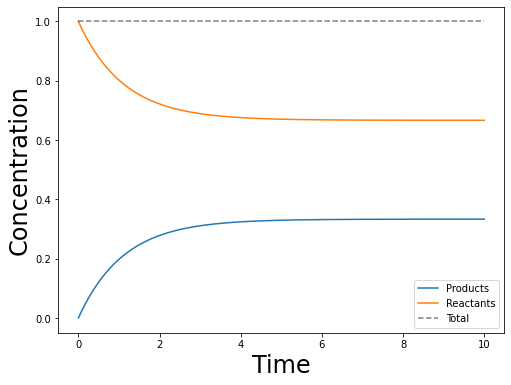

In [4]:
# initial conditions
y0 = (0, 1.)
kf, kb = (.3, .6)

time = np.linspace(0, 10, 1000)
res = odeint(conversion, y0, time, args=(kf, kb))
total = np.sum(res, axis=1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(time, res[:, 0], label='Products')
ax.plot(time, res[:, 1], label='Reactants')
ax.plot(time, total, 'k--', label='Total', alpha=.5)
ax.set_xlabel('Time', fontsize=24)
ax.set_ylabel('Concentration', fontsize=24)
ax.legend()

This plot well highlights one of the main characteristics of the reversible reactions: in these reactions the combination of products and reactants does not go to a completement *but* it goes to an **equilibrium**.

From a kinetic point-of-view this behavior explains the coexistance of two elementary reactions (forward and backward) completely independent.

For this reason the reaction is also called as **inter-conversion**, i.e the total velocity is given by the difference of the velocities of the two reactions.

Thus, given the following **inter-conversion** equation

$$
A + B \underset{k_b}{\stackrel{k_f}{\rightleftharpoons}} C
$$

The velocities of the two reactions can be extimated as

$$
v_1 = -\frac{d[A]}{dt} = - \frac{d[B]}{dt} = k_f [A][B]
$$
$$
v_2 = -\frac{d[C]}{dt} = k_b [C]
$$

and the total velocity is given by

$$
v_{\text{Tot}} = k_f [A][B] - k_b [C]
$$

In this situation we can define a **stationary state** when the two reaction rates will be equal

$$
k_f [A][B] = k_b [C] \quad \Rightarrow \quad k_c = \frac{k_f}{k_b}
$$

and the time required to reach this state will be given by

$$
\tau = \frac{1}{k_f + k_b}
$$

from which is estimated the classification between *fast* and *slow* reactions.

> **Example:** An example of this kind of reaction is given by the photoreceptor cells of the retina which transform the (input) light signals into (output) elettrica signals.
In the biological field, an incoming signal transformed into another type of signal is modelled by a pluri-molecular kinetic reaction.

> **Example:** A second example is given by the immunoglobulins (antibodies) of the immune system.
The immune system is an ensemble of cells which produce proteins (immunoglobulins) and lymphocytes at the presence of antigen.
The antibodies are exposed on the surface of the cells as receptors, aka "controllers" who check the adherence of extern antigen: when the antigen is combined with the receptor an immunitary response is made.
In these terms we can model the bi-molecular kinetic reaction of the receptor (A) and the antigen (B) with these equations.

#### Extra - C++ version

As before, we propose the C++ counterpart of the same code.

>⚠️**Note:** Unfortunately, C++ does not have a ready-to-use function for differential equation integration.
> Thus, we need to integrate the 1st order kinetic equation by-hand.

```c++
// g++ fist_order_kinetic.cpp -std=c++14 -O3 -o fist_order_kinetic

#include <memory>
#include <algorithm>
#include <type_traits>
#include <cassert>

template < class type >
using is_floating_point = typename std :: enable_if < std :: is_floating_point < type > :: value > :: type *;

template < class type, is_floating_point < type > = nullptr >
using array = std :: unique_ptr < type[] >;

/**
* @brief 1st order kinetic
*
* @param x List of time points.
* @param p0 Initial condition of the product.
* @param r0 Initial condition of the reagent.
* @param kf Constant of the forward reaction.
* @param kb Constant of the backward reaction.
* @param P The resulting product array.
* @param R The resulting reagent array.
*
* @tparam type Data-type of arrays
* @tparam Length of time points.
*
*/
template < class type, int32_t N >
void first_order (const array < type > & x, const type & p0, const type & r0,
                  const type & kf, const type & kb,
                  array < type > & P, array < type > & R
                 )
{
  // determine the interval as diff
  const type dx = x[1] - x[0]; // Note: we are assuming it is constant!!

  // Set the initial condition
  P[0] = p0;
  R[0] = r0;

  // Integrate the equation using the Euler method
  for (int32_t i = 0; i < N - 1; ++i)
  {
    P[i + 1] = P[i] + ( kf * R[i] - kb * P[i]) * dx;
    R[i + 1] = R[i] + (-kf * R[i] + kb * P[i]) * dx;
  }
}

int32_t main (/*int32_t argc, char ** argv*/)
{
  const float p0 = 0.f;
  const float r0 = 1.f;
  const float kf = 0.3f;
  const float kb = 0.6f;

  const int32_t iterations = 1000;
  const float dt = 1e-2f;

  array < float > time(new float[iterations]);
  std :: generate_n(time.get(), iterations, [n = 0, dt] () mutable { return dt * n++; });

  array < float > resulting_product(new float[iterations]);
  array < float > resulting_reagent(new float[iterations]);
  array < float > resulting_total(new float[iterations]);

  first_order < float, iterations >(time, p0, r0, kf, kb, resulting_product, resulting_reagent);

  std :: transform (resulting_product.get(), resulting_product.get() + iterations + 1,
                    resulting_reagent.get(),
                    resulting_total.get(), std :: plus < float >());

  // consistency check -> total concentration must be costant and equal to 1. (less than numerical precision!)
  assert (std :: all_of(resulting_total.get(), resulting_total.get() + iterations,
                        [] (const float & tot) { return std :: abs(tot - 1.) < 1e-5f; }));

  return 0;
}

```